# Classificatin of delayed not delayed

In [1]:
# load data
import pandas as pd 

path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
fl_df = pd.read_csv(path+'mini_sample.csv')

In [2]:
# create target variable of 0 or 1 for not_delay, delayed
fl_df['delayed'] = (fl_df['arr_delay'] > 0.0).astype('int').astype('category')

In [3]:
fl_df[['arr_delay','delayed']].dtypes

arr_delay     float64
delayed      category
dtype: object

In [15]:
# convert fl_date into timestamp
import datetime as dt

#fl_df['timestamp'] = pd.to_datetime(fl_df['fl_date']).map(dt.datetime.toordinal)
#fl_df = fl_df.drop(labels=['fl_date'], axis=1)

In [ ]:
fl_df.isnull().sum().sort_values().tail()

## Logistic Regression

In [95]:
cols=['op_unique_carrier',
       'origin_airport_id',
       'dest_airport_id', 
       'distance', 'origin_fl_density', 'dest_fl_density','month',
       'weekday',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'percent_dep_delay', 'dist_group_delay_ratio',
       'mean_mo_delay_origin_airport',]

In [96]:
X = fl_df[cols]
y = fl_df['delayed']

In [97]:
X = pd.get_dummies(X, columns=[
        'op_unique_carrier',
       'origin_airport_id',
       'dest_airport_id', 
       'month',
       'weekday',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       ])

X[['crs_arr_daytime', 'crs_dep_daytime','dep_early_morning']] = X[['crs_arr_daytime', 'crs_dep_daytime', 'dep_early_morning']].astype('category')

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

In [99]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=5)
clf.fit(X_train, y_train)

LogisticRegression(random_state=5)

Text(0.5, 0, 'Relative Feature Importance')

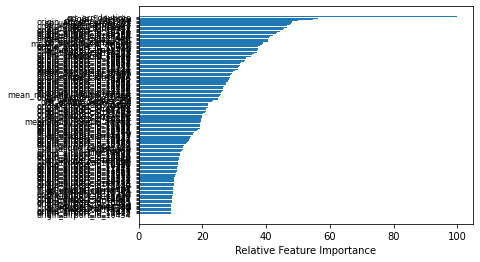

In [100]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
imp_feats = []
for i in feature_importance:
    if i >= 10:
        imp_feats.append(i)
imp_feats = np.array(imp_feats)
sorted_idx = np.argsort(imp_feats)
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, imp_feats[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

In [101]:
y_pred = clf.predict(X_test)

In [102]:
# create confusion matrix for eval

from sklearn import metrics

cnf_matrix = metrics.classification_report(y_test,y_pred)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.55      0.53      0.54      7670
           1       0.53      0.55      0.54      7330

    accuracy                           0.54     15000
   macro avg       0.54      0.54      0.54     15000
weighted avg       0.54      0.54      0.54     15000



In [20]:
# eval model with metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5172666666666667
Precision: 0.505891698662783
Recall: 0.5212824010914052


In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

print(roc_auc)

0.5234006983143339


## Logreg with feature engineering

In [120]:
# load data
import pandas as pd 

path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
fl_df = pd.read_csv(path+'balanced_more_flight_feats.csv')

In [121]:
# create target variable of 0 or 1 for not_delay, delayed
fl_df['delayed'] = (fl_df['arr_delay'] > 0.0).astype('int').astype('category')

In [122]:
fl_df['cancelled'] = fl_df['cancelled'].astype('category')
fl_df['diverted'] = fl_df['diverted'].astype('category')

In [140]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

cat_vars = fl_df.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    fl_df[col] = label_encoder.fit_transform(fl_df[col])

In [243]:
cols = ['mkt_unique_carrier', 'branded_code_share', 
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id','origin_city_name',
       'dest_airport_id', 'dest','crs_dep_time',
       'taxi_out', 'wheels_off','taxi_in',
       'cancelled', 'diverted',
       'crs_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'crs_arr_hour',
        'origin_freight/mo', 'dest_freight/mo',
       'arr_delay','delayed']

In [244]:
X = fl_df[cols]
y = fl_df['delayed']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

In [246]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [247]:
# create confusion matrix for eval

from sklearn import metrics

cnf_matrix = metrics.classification_report(y_test,y_pred)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.50      0.91      0.65     66873
           1       0.51      0.09      0.16     67017

    accuracy                           0.50    133890
   macro avg       0.51      0.50      0.40    133890
weighted avg       0.51      0.50      0.40    133890



Text(0.5, 0, 'Relative Feature Importance')

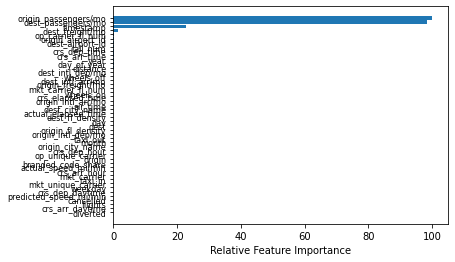

In [214]:
import matplotlib.pyplot as plt

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

## The above, but with scaling

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xsc = scaler.fit_transform(X)


In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [250]:
# create confusion matrix for eval

from sklearn import metrics

cnf_matrix = metrics.classification_report(y_test,y_pred)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.50      0.91      0.65     66873
           1       0.51      0.09      0.16     67017

    accuracy                           0.50    133890
   macro avg       0.51      0.50      0.40    133890
weighted avg       0.51      0.50      0.40    133890



## Remove correlated feats

<AxesSubplot:>

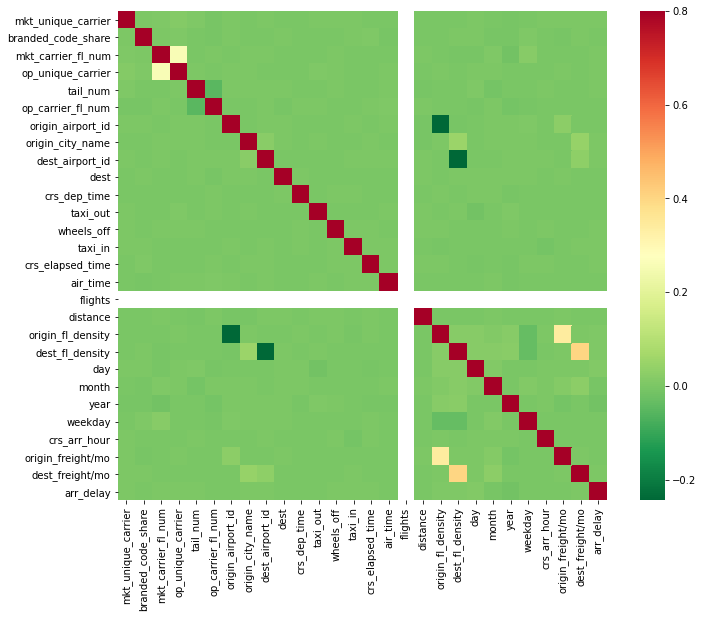

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['mkt_unique_carrier', 'branded_code_share', 
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id','origin_city_name',
       'dest_airport_id', 'dest','crs_dep_time',
       'taxi_out', 'wheels_off','taxi_in',
       'cancelled', 'diverted',
       'crs_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'crs_arr_hour',
        'origin_freight/mo', 'dest_freight/mo',
       'arr_delay','delayed']

corrmat = fl_df[cols].corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn_r')

In [ ]:
# drop origin_intl_dep/mo, dest_intl_dep/mo, 
# crs_dep_hour, dest_intl_arr/mo, origin_intl_arr/mo, 
# dest_passengers/mo, actual_elapsed_time, actual_speed_mi/min, 
# crs_arr_time, origin_passengers/mo, timestamp, crs_arr_daytime, predicted_speed_mi/min
# crs_dep_daytime, wheels_on, dest_city_name, origin, mrk_carrier
# day_of_year

## Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [104]:
y_pred = gnb.predict(X_test)

In [105]:
from sklearn import metrics

gnb_matrix = metrics.classification_report(y_test,y_pred)
print(gnb_matrix)

              precision    recall  f1-score   support

           0       0.53      0.09      0.15      7670
           1       0.49      0.92      0.64      7330

    accuracy                           0.49     15000
   macro avg       0.51      0.50      0.39     15000
weighted avg       0.51      0.49      0.39     15000



In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5080666666666667


In [240]:
cols = ['mkt_unique_carrier', 'branded_code_share', 
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id','origin_city_name',
       'dest_airport_id', 'dest','crs_dep_time',
       'taxi_out', 'wheels_off','taxi_in',
       'cancelled', 'diverted',
       'crs_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'crs_arr_hour',
        'origin_freight/mo', 'dest_freight/mo',
       ]


X = fl_df[cols]
y = fl_df['delayed']

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [242]:
# create confusion matrix for eval

from sklearn import metrics

cnf_matrix = metrics.classification_report(y_test,y_pred)
print(cnf_matrix)

/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67     66873
           1       0.00      0.00      0.00     67017

    accuracy                           0.50    133890
   macro avg       0.25      0.50      0.33    133890
weighted avg       0.25      0.50      0.33    133890



/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
